In [390]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [391]:
import pandas as pd
from feature_engine.datetime import DatetimeFeatures
from feature_engine.imputation import DropMissingData
from feature_engine.creation import CyclicalFeatures
from feature_engine.selection import DropFeatures
from feature_engine.timeseries.forecasting import (LagFeatures,WindowFeatures,)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [392]:
data=pd.read_csv('AirQualityUCI.csv', sep=';', parse_dates=[['Date', 'Time']]).iloc[:, :-2]
data.dropna(inplace=True)

In [393]:
new_names = [
    'Date_Time',
    'CO_true',
    'CO_sensor',
    'NMHC_true',
    'C6H6_true',
    'NMHC_sensor',
    'NOX_true',
    'NOX_sensor',
    'NO2_true',
    'NO2_sensor',
    'O3_sensor',
    'T',
    'RH',
    'AH',    
]

In [394]:
data.columns=new_names

In [395]:
data.head()

,Date_Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
0,10/03/2004 18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004 21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004 22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [396]:
predictors=data.loc[1:]

In [397]:
predictors

,Date_Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
1,10/03/2004 19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004 20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004 21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004 22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
5,10/03/2004 23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005 10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005 11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005 12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005 13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [398]:
data['Date_Time'] = data['Date_Time'].str.replace('.', ':', regex=False)

data['Date_Time'] = pd.to_datetime(data['Date_Time'])
# use dayfirst=True parameter if format is dd/mm/yyyy HH:mm:ss Eg: pd.to_datetime(data['Date_Time'], dayfirst=True)

data.head()

,Date_Time,CO_true,CO_sensor,NMHC_true,C6H6_true,NMHC_sensor,NOX_true,NOX_sensor,NO2_true,NO2_sensor,O3_sensor,T,RH,AH
0,2004-10-03 18:00:00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,2004-10-03 19:00:00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,2004-10-03 20:00:00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,2004-10-03 21:00:00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,2004-10-03 22:00:00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [399]:
for var in predictors:
    if data[var].dtype=="O":
        data[var]=data[var].str.replace(',','.')
        data[var]=pd.to_numeric(data[var])

In [400]:
data=data.loc[:,["Date_Time", "CO_sensor", "RH"]]

In [401]:
data.head()

,Date_Time,CO_sensor,RH
0,2004-10-03 18:00:00,1360.0,48.9
1,2004-10-03 19:00:00,1292.0,47.7
2,2004-10-03 20:00:00,1402.0,54.0
3,2004-10-03 21:00:00,1376.0,60.0
4,2004-10-03 22:00:00,1272.0,59.6


In [402]:
data.set_index('Date_Time',inplace=True)
data.head()

,CO_sensor,RH
Date_Time,,
2004-10-03 18:00:00,1360.0,48.9
2004-10-03 19:00:00,1292.0,47.7
2004-10-03 20:00:00,1402.0,54.0
2004-10-03 21:00:00,1376.0,60.0
2004-10-03 22:00:00,1272.0,59.6


In [403]:
data1=data.copy()

In [404]:
data.sort_index(inplace=True)
data.head()

,CO_sensor,RH
Date_Time,,
2004-01-04 00:00:00,1143.0,61.6
2004-01-04 01:00:00,1044.0,63.9
2004-01-04 02:00:00,1034.0,67.2
2004-01-04 03:00:00,956.0,73.1
2004-01-04 04:00:00,909.0,66.6


In [405]:
# Reducing data size.
data = data.loc["2004-04-01":"2005-04-30"]

In [406]:
data.head()

,CO_sensor,RH
Date_Time,,
2004-04-04 00:00:00,1224.0,56.5
2004-04-04 01:00:00,1215.0,59.2
2004-04-04 02:00:00,1115.0,62.4
2004-04-04 03:00:00,1124.0,65.0
2004-04-04 04:00:00,1028.0,65.3


In [407]:
data=data.loc[(data['CO_sensor']>=0)& data['RH']>0] # removing outliers

# DateTime Features using FeatureEngine

In [408]:
dtf=DatetimeFeatures(
variables='index',
features_to_extract=[
    "month",
    "week",
    "day_of_week",
    "day_of_month",
    'hour',
    "weekend"
],
)
data=dtf.fit_transform(data)# extracting the date time variable
data.head()

,CO_sensor,RH,month,week,day_of_week,day_of_month,hour,weekend
Date_Time,,,,,,,,
2004-04-04 00:00:00,1224.0,56.5,4,14,6,4,0,1
2004-04-04 01:00:00,1215.0,59.2,4,14,6,4,1,1
2004-04-04 02:00:00,1115.0,62.4,4,14,6,4,2,1
2004-04-04 03:00:00,1124.0,65.0,4,14,6,4,3,1
2004-04-04 04:00:00,1028.0,65.3,4,14,6,4,4,1


# Lag Features

In [409]:
lagfeature=LagFeatures(
    variables=["CO_sensor","RH"],
    freq=["1H","24H"], # moves 1 hour and 24 hour fordward
    missing_values="ignore"
)
data=lagfeature.fit_transform(data)#adding lag feature


In [410]:
data.head()

,CO_sensor,RH,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H
Date_Time,,,,,,,,,,,,
2004-04-04 00:00:00,1224.0,56.5,4,14,6,4,0,1,NaN,NaN,NaN,NaN
2004-04-04 01:00:00,1215.0,59.2,4,14,6,4,1,1,1224.0,56.5,NaN,NaN
2004-04-04 02:00:00,1115.0,62.4,4,14,6,4,2,1,1215.0,59.2,NaN,NaN
2004-04-04 03:00:00,1124.0,65.0,4,14,6,4,3,1,1115.0,62.4,NaN,NaN
2004-04-04 04:00:00,1028.0,65.3,4,14,6,4,4,1,1124.0,65.0,NaN,NaN


# Window feature

In [411]:
windowfeature=WindowFeatures(
variables=["CO_sensor","RH"],
window="3H",
freq="1H",
missing_values="ignore"
)
data=windowfeature.fit_transform(data)

In [412]:
data.head()

,CO_sensor,RH,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H,CO_sensor_window_3H_mean,RH_window_3H_mean
Date_Time,,,,,,,,,,,,,,
2004-04-04 00:00:00,1224.0,56.5,4,14,6,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-04 01:00:00,1215.0,59.2,4,14,6,4,1,1,1224.0,56.5,NaN,NaN,1224.000000,56.500000
2004-04-04 02:00:00,1115.0,62.4,4,14,6,4,2,1,1215.0,59.2,NaN,NaN,1219.500000,57.850000
2004-04-04 03:00:00,1124.0,65.0,4,14,6,4,3,1,1115.0,62.4,NaN,NaN,1184.666667,59.366667
2004-04-04 04:00:00,1028.0,65.3,4,14,6,4,4,1,1124.0,65.0,NaN,NaN,1151.333333,62.200000


# Perodic Feature

In [413]:
cyclicalfeature=CyclicalFeatures(
    variables=["CO_sensor","RH"],
    drop_original=False
)
data=cyclicalfeature.fit_transform(data)

In [414]:
data.head()

,CO_sensor,RH,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H,CO_sensor_window_3H_mean,RH_window_3H_mean,CO_sensor_sin,CO_sensor_cos,RH_sin,RH_cos
Date_Time,,,,,,,,,,,,,,,,,,
2004-04-04 00:00:00,1224.0,56.5,4,14,6,4,0,1,NaN,NaN,NaN,NaN,NaN,NaN,-0.635300,-0.772266,-0.758274,-0.651936
2004-04-04 01:00:00,1215.0,59.2,4,14,6,4,1,1,1224.0,56.5,NaN,NaN,1224.000000,56.500000,-0.613303,-0.789848,-0.868377,-0.495905
2004-04-04 02:00:00,1115.0,62.4,4,14,6,4,2,1,1215.0,59.2,NaN,NaN,1219.500000,57.850000,-0.340386,-0.940286,-0.957612,-0.288060
2004-04-04 03:00:00,1124.0,65.0,4,14,6,4,3,1,1115.0,62.4,NaN,NaN,1184.666667,59.366667,-0.366728,-0.930328,-0.994171,-0.107815
2004-04-04 04:00:00,1028.0,65.3,4,14,6,4,4,1,1124.0,65.0,NaN,NaN,1151.333333,62.200000,-0.075027,-0.997181,-0.996237,-0.086666


# Missing values

In [415]:
data.isnull().sum()

CO_sensor                     0
RH                            0
month                         0
week                          0
day_of_week                   0
day_of_month                  0
hour                          0
weekend                       0
CO_sensor_lag_1H             27
RH_lag_1H                    27
CO_sensor_lag_24H           461
RH_lag_24H                  461
CO_sensor_window_3H_mean     27
RH_window_3H_mean            27
CO_sensor_sin                 0
CO_sensor_cos                 0
RH_sin                        0
RH_cos                        0
dtype: int64

In [416]:
#Droping the missing data
imputer=DropMissingData()
data=imputer.fit_transform(data)

In [417]:
data.isnull().sum()

CO_sensor                   0
RH                          0
month                       0
week                        0
day_of_week                 0
day_of_month                0
hour                        0
weekend                     0
CO_sensor_lag_1H            0
RH_lag_1H                   0
CO_sensor_lag_24H           0
RH_lag_24H                  0
CO_sensor_window_3H_mean    0
RH_window_3H_mean           0
CO_sensor_sin               0
CO_sensor_cos               0
RH_sin                      0
RH_cos                      0
dtype: int64

Droping Orginal Time Series Data to avoid lookahead bais

In [418]:
data2=data.copy()

In [419]:
dropft=DropFeatures(features_to_drop=["CO_sensor","RH"])
data=dropft.fit_transform(data)
data.head()

,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H,CO_sensor_window_3H_mean,RH_window_3H_mean,CO_sensor_sin,CO_sensor_cos,RH_sin,RH_cos
Date_Time,,,,,,,,,,,,,,,,
2004-04-05 00:00:00,4,15,0,5,0,0,1188.0,60.8,1224.0,56.5,1165.666667,58.566667,-0.189717,-0.981839,-0.998682,-0.051334
2004-04-05 01:00:00,4,15,0,5,1,0,1065.0,65.8,1215.0,59.2,1149.666667,61.800000,0.015645,-0.999878,-0.623292,0.781989
2004-04-05 02:00:00,4,15,0,5,2,0,999.0,79.2,1115.0,62.4,1084.000000,68.600000,0.286914,-0.957956,-0.578001,0.816036
2004-04-05 03:00:00,4,15,0,5,3,0,911.0,80.0,1124.0,65.0,991.666667,75.000000,0.398526,-0.917157,-0.518794,0.854899
2004-04-05 04:00:00,4,15,0,5,4,0,873.0,81.0,1028.0,65.3,927.666667,80.066667,0.375445,-0.926845,-0.518794,0.854899


# Pipeline

Extracting all the features in one step using feature engine pipline

In [420]:
data=data1

In [421]:
data.head()

,CO_sensor,RH
Date_Time,,
2004-10-03 18:00:00,1360.0,48.9
2004-10-03 19:00:00,1292.0,47.7
2004-10-03 20:00:00,1402.0,54.0
2004-10-03 21:00:00,1376.0,60.0
2004-10-03 22:00:00,1272.0,59.6


In [422]:
pipe=Pipeline([
    ("datetime_feature",dtf),
    ("lagfeatue",lagfeature),
    ("windowfeature",windowfeature),
    ("Perodic",cyclicalfeature),
    ("dropna",imputer),
    ("drop_ts",dropft),
    
])

In [423]:
#fiting the pipeline to the data and adding features.

In [424]:
data=pipe.fit_transform(data)

In [425]:
data.head()

,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H,CO_sensor_window_3H_mean,RH_window_3H_mean,CO_sensor_sin,CO_sensor_cos,RH_sin,RH_cos
Date_Time,,,,,,,,,,,,,,,,
2004-01-05 00:00:00,1,2,0,5,0,0,1203.0,52.0,1143.0,61.6,1193.666667,48.000000,-0.948161,-0.317791,-0.999810,0.019479
2004-01-05 01:00:00,1,2,0,5,1,0,1425.0,66.8,1044.0,63.9,1271.333333,55.600000,-0.470378,-0.882465,-0.992106,0.125404
2004-01-05 02:00:00,1,2,0,5,2,0,1179.0,68.3,1034.0,67.2,1269.000000,62.366667,-0.083064,-0.996544,-0.966307,0.257393
2004-01-05 03:00:00,1,2,0,5,3,0,1047.0,70.2,956.0,73.1,1217.000000,68.433333,0.033873,-0.999426,-0.893485,0.449092
2004-01-05 04:00:00,1,2,0,5,4,0,1009.0,73.1,909.0,66.6,1078.333333,70.533333,0.412356,-0.911023,-0.971558,0.236802


# Spliting the data into Train and Test sets

last month data is 4 of march 2005 but we need 24 hours pervious data to create the feature

In [426]:
data2.copy()

,CO_sensor,RH,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H,RH_lag_1H,CO_sensor_lag_24H,RH_lag_24H,CO_sensor_window_3H_mean,RH_window_3H_mean,CO_sensor_sin,CO_sensor_cos,RH_sin,RH_cos
Date_Time,,,,,,,,,,,,,,,,,,
2004-04-05 00:00:00,1065.0,65.8,4,15,0,5,0,0,1188.0,60.8,1224.0,56.5,1165.666667,58.566667,-0.189717,-0.981839,-0.998682,-0.051334
2004-04-05 01:00:00,999.0,79.2,4,15,0,5,1,0,1065.0,65.8,1215.0,59.2,1149.666667,61.800000,0.015645,-0.999878,-0.623292,0.781989
2004-04-05 02:00:00,911.0,80.0,4,15,0,5,2,0,999.0,79.2,1115.0,62.4,1084.000000,68.600000,0.286914,-0.957956,-0.578001,0.816036
2004-04-05 03:00:00,873.0,81.0,4,15,0,5,3,0,911.0,80.0,1124.0,65.0,991.666667,75.000000,0.398526,-0.917157,-0.518794,0.854899
2004-04-05 04:00:00,881.0,81.0,4,15,0,5,4,0,873.0,81.0,1028.0,65.3,927.666667,80.066667,0.375445,-0.926845,-0.518794,0.854899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,1314.0,29.3,4,14,0,4,10,0,1297.0,36.3,1334.0,60.9,1375.666667,49.033333,-0.824893,-0.565288,0.875315,-0.483553
2005-04-04 11:00:00,1163.0,23.7,4,14,0,4,11,0,1314.0,29.3,1280.0,59.8,1352.333333,38.166667,-0.477250,-0.878767,0.994171,-0.107815
2005-04-04 12:00:00,1142.0,18.3,4,14,0,4,12,0,1163.0,23.7,1330.0,57.6,1258.000000,29.766667,-0.418518,-0.908209,0.962563,0.271057


In [427]:
pd.Timestamp("2005-03-04")-pd.offsets.Hour(24)

Timestamp('2005-03-03 00:00:00')

In [428]:
#spliting the data
#input data
X_train=data2[data2.index<"2005-03-04"]
X_test=data2[data2.index>=pd.Timestamp("2005-03-04") - pd.offsets.Hour(24)]

In [429]:
#target
Y_train=data2[data2.index<"2005-03-04"]["CO_sensor"]
Y_test=data2[data2.index>=pd.Timestamp("2005-03-04") - pd.offsets.Hour(24)]["CO_sensor"]

# Train pipeline and model

In [430]:
# Trainig the pipeline and creating the features for the training set
X_train_1=pipe.fit_transform(X_train)
X_train_1.head()

,month,week,day_of_week,day_of_month,hour,weekend,CO_sensor_lag_1H_x,RH_lag_1H_x,CO_sensor_lag_24H_x,RH_lag_24H_x,...,CO_sensor_sin,CO_sensor_cos,RH_sin,RH_cos,CO_sensor_lag_1H_y,RH_lag_1H_y,CO_sensor_lag_24H_y,RH_lag_24H_y,CO_sensor_window_3H_mean_y,RH_window_3H_mean_y
Date_Time,,,,,,,,,,,,,,,,,,,,,
2004-04-06 00:00:00,4,15,1,6,0,0,932.0,59.5,1065.0,65.8,...,0.093734,-0.995597,-0.336838,-0.941563,932.0,59.5,1065.0,65.8,996.333333,62.100000
2004-04-06 01:00:00,4,15,1,6,1,0,974.0,49.2,999.0,79.2,...,0.378343,-0.925666,-0.228190,-0.973617,974.0,49.2,999.0,79.2,925.333333,54.900000
2004-04-06 02:00:00,4,15,1,6,2,0,880.0,47.6,911.0,80.0,...,0.455105,-0.890438,-0.396140,-0.918190,880.0,47.6,911.0,80.0,928.666667,52.100000
2004-04-06 03:00:00,4,15,1,6,3,0,853.0,50.1,873.0,81.0,...,0.283915,-0.958849,-0.580887,-0.813984,853.0,50.1,873.0,81.0,902.333333,48.966667
2004-04-06 04:00:00,4,15,1,6,4,0,912.0,53.1,881.0,81.0,...,0.427025,-0.904240,-0.631566,-0.775322,912.0,53.1,881.0,81.0,881.666667,50.266667


In [431]:
# Our transformation pipeline removed observations  with missing data, so we need to remove those
# observations from the target variable as well.

Y_train_1=Y_train.loc[X_train_1.index]

In [432]:
X_train_1.shape

(5998, 22)

In [433]:
Y_train_1.shape

(5998,)

In [434]:
lasso=Lasso(random_state=0)
lasso.fit(X_train_1,Y_train_1)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+06, tolerance: 2.725e+04
  model = cd_fast.enet_coordinate_descent(


Lasso(random_state=0)

# making prediction

In [435]:
predict=lasso.predict(X_train_1)

In [436]:
predict

array([941.8261358 , 884.79348829, 852.10791765, ..., 865.93455833,
       829.57752019, 819.65340402])

Text(0, 0.5, 'Predictions')

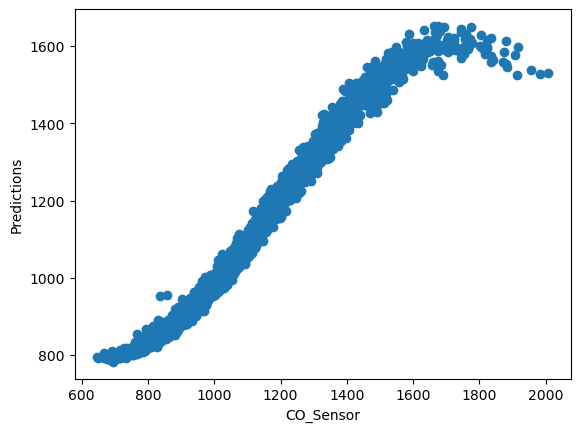

In [443]:
# ploting the orginal vs prediction
plt.scatter(Y_train_1,predict)
plt.xlabel("CO_Sensor")
plt.ylabel("Predictions")


In [446]:
mean_squared_error(predict,Y_train_1,squared=False)

33.03170528282233